# K-Nearest Neighbors (K-NN)
K-Nearest Neighbors (K-NN) Classification is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

The K-NN algorithm works by finding the K nearest neighbors to a given data point based on a distance metric, such as Euclidean distance. The class or value of the data point is then determined by the majority vote or average of the K neighbors.

These metrics are chosen based on the nature of the data and the problem requirements. The distance metrics are:
1.   ### **Euclidean distance**

      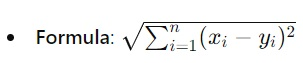

      Explanation: This is the straight-line distance between two points in Euclidean space (like the ordinary distance you'd measure with a ruler).

2.   ### **Manhattan Distance (L1 Distance)**

      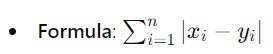

      Explanation: This is the sum of the absolute differences of their coordinates. It is like measuring the total number of blocks you'd walk to get from one point to another, always sticking to the grid lines. This is different from Euclidean distance, which would measure the straight-line (diagonal) distance between the points.

3.   ### **Cosine distance**

      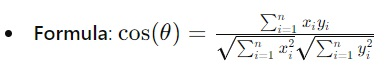

      Explanation: Cosine similarity measures the cosine of the angle between two vectors. It is used to determine how similar two vectors are in terms of direction, regardless of their magnitude. This metric is especially useful in high-dimensional spaces and for comparing text data in natural language processing.

      - **Cosine of the Angle:** Cosine similarity measures the cosine of the angle between these two vectors. The cosine value ranges from -1 to 1:
        - cos(0 )=1: Vectors point in the same direction (maximum similarity).
        - cos(90 )=0: Vectors are orthogonal (no similarity).
        - cos(180 )=1: Vectors point in opposite directions (maximum dissimilarity).

4.   ### **Minkowski Distance**

        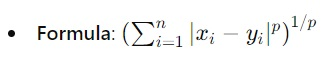

        Explanation: This is a generalized distance metric that includes Euclidean and Manhattan distances as special cases. When p=2, it is Euclidean distance; when p=1, it is Manhattan distance.  


     




This notebook demonstrates how to use the K-Nearest Neighbors (K-NN) algorithm to classify whether individuals will purchase a product based on their age and estimated salary. It involves preprocessing the data, training the K-NN classifier, predicting new results, evaluating the model, and visualizing the results for both the training and test sets. The K-NN classifier is shown to be effective in this classification task, with the confusion matrix and accuracy score providing insights into its performance.

## 1. Importing the libraries

In [1]:
import numpy as np               # numerical operations
import matplotlib.pyplot as plt  # plotting graphs
import pandas as pd              # data manipulation and analysis

## 2. Importing the dataset

In [3]:
# Importing the dayta set

# The dataset contains the following columns:

# Age: The age of the individual.
# EstimatedSalary: The estimated salary of the individual.
# Purchased: Indicates whether the individual purchased the product (0 = No, 1 = Yes).

dataset = pd.read_csv('Social_Network_Ads.csv') # Loads the dataset
X = dataset.iloc[:, :-1].values # Contains all the rows and columns except the last one (Age and Estimated Salary).
y = dataset.iloc[:, -1].values # Contains all the rows and only the last column (Purchased).

## 3. Splitting the dataset into the Training set and Test set

In [4]:
# train_test_split is used to split the dataset into training and testing sets.
from sklearn.model_selection import train_test_split
# test_size=0.25: 25% of the data is used as the test set, and 75% for training.
# random_state=0: Ensures reproducibility of the results.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
print(X_train)

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  72000]
 [    45  26000]
 [    33  69000]
 [    20  82000]
 [    31  74000]
 [    42  80000]
 [    35  72000]
 [    33 149000]
 [    40  71000]
 [    51 146000]
 [    46  79000]
 [    35  75000]
 [    38  51000]
 [    36  75000]
 [    37  78000]
 [    38  61000]
 [    60 108000]
 [    20  82000]
 [    57  74000]
 [    42  65000]
 [    26  8000

In [8]:
print(y_train)

[0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 0]


In [9]:
print(X_test)

[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]
 [    30  49000]
 [    28  55000]
 [    37  55000]
 [    39  77000]
 [    20  86000]
 [    32 117000]
 [    37  77000]
 [    19  85000]
 [    55 130000]
 [    35  22000]
 [    35  47000]
 [    47 144000]
 [    41  51000]
 [    47 105000]
 [    23  28000]
 [    49 141000]
 [    28  87000]
 [    29  80000]
 [    37  62000]
 [    32  86000]
 [    21  88000]
 [    37  79000]
 [    57  60000]
 [    37  53000]
 [    24  58000]
 [    18  52000]
 [    22  81000]
 [    34  43000]
 [    31  34000]
 [    49  36000]
 [    27  88000]
 [    41  52000]
 [    27  84000]
 [    35  20000]
 [    43 112000]
 [    27  58000]
 [    37  80000]
 [    52  90000]
 [    26  30000]
 [    49  86000]
 [    57 122000]
 [    34  25000]
 [    35  57000]
 [    34 115000]
 [    59  88000]
 [    45  32000]
 [    29  83000]
 [    26  80000]
 [    49  2800

In [6]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


## 4. Feature Scaling

In [10]:
# Standardize (scale) features of a dataset using the StandardScaler from Scikit-learn.
# This preprocessing step is crucial for many machine learning algorithms that are sensitive to the scale of input features,
# such as support vector machines and k-nearest neighbors.

# This imports the StandardScaler class, which standardizes features by removing
# the mean and scaling to unit variance.
# This is done feature-wise (independently for each feature)
# by computing the relevant statistics on the samples in the training set.

# StandardScaler is used to standardize features by removing the mean and scaling to unit variance.
# Standardizing ensures all features contribute equally to the model.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
print(X_train)

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]
 [-1.20093113 -1.58254245]
 [ 2.1661655   0.93986109]
 [-0.01254409  1.22979253]
 [ 0.18552042  1.08482681]
 [ 0.38358493 -0.48080297]
 [-0.30964085 -0.30684411]
 [ 0.97777845 -0.8287207 ]
 [ 0.97777845  1.8676417 ]
 [-0.01254409  1.25878567]
 [-0.90383437  2.27354572]
 [-1.20093113 -1.58254245]
 [ 2.1661655  -0.79972756]
 [-1.39899564 -1.46656987]
 [ 0.38358493  2.30253886]
 [ 0.77971394  0.76590222]
 [-1.00286662 -0.30684411]
 [ 0.08648817  0.76590222]
 

In [12]:
print(X_test)

[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]
 [-1.10189888 -1.43757673]
 [-0.70576986 -1.58254245]
 [-0.21060859  2.15757314]
 [-1.99318916 -0.04590581]
 [ 0.8787462  -0.77073441]
 [-0.80480212 -0.59677555]
 [-1.00286662 -0.42281668]
 [-0.11157634 -0.42281668]
 [ 0.08648817  0.21503249]
 [-1.79512465  0.47597078]
 [-0.60673761  1.37475825]
 [-0.11157634  0.21503249]
 [-1.89415691  0.44697764]
 [ 1.67100423  1.75166912]
 [-0.30964085 -1.37959044]
 [-0.30964085 -0.65476184]
 [ 0.8787462   2.15757314]
 [ 0.28455268 -0.53878926]
 [ 0.8787462   1.02684052]
 [-1.49802789 -1.20563157]
 [ 1.07681071  2.07059371]
 [-1.00286662  0.50496393]
 [-0.90383437  0.30201192]
 [-0.11157634 -0.21986468]
 [-0.60673761  0.47597078]
 [-1.6960924   0.53395707]
 [-0.11157634  0.27301877]
 [ 1.86906873 -0.27785096]
 [-0.11157634 -0.48080297]
 [-1.39899564 -0.33583725]
 [-1.99318916 -0.50979612]
 [-1.59706014  0.33100506]
 

## 5. Training the K-NN model on the Training set

In [13]:
# Importing the Classifier:
# This line imports the KNeighborsClassifier class from the sklearn.neighbors module.

from sklearn.neighbors import KNeighborsClassifier

# Creates an instance of the KNeighborsClassifier class with n_neighbors=5, metric='minkowski', and p=2.

# n_neighbors=5:
#   This sets the number of neighbors to use (k) for the classification. In this case, it's set to 5.
# metric='minkowski':
#   This specifies the distance metric to use.
#   The Minkowski distance is a generalization of both the Euclidean distance and the Manhattan distance.
# p=2:
#   This parameter is used with the Minkowski metric.
#   When p=2, it calculates the Euclidean distance.
#   When p=1, it calculates the Manhattan distance.


# Fitting the Classifier to the Training Data:

# This line trains the k-nearest neighbors classifier using the training data.
# X_train is the feature matrix (input data) for training.
# y_train is the target vector (labels) for training.
# By calling the fit method, the classifier learns the relationships between the input data (X_train)
# and the output labels (y_train), making it ready to make predictions on new, unseen data.

classifier.fit(X_train, y_train)

KNeighborsClassifier()

## 6. Predicting a new result

In [14]:
# Uses the trained K-NN classifier to make a prediction for a new data point (Age: 30, Estimated Salary: 87000).
# The result [0] indicates that the model predicts this person did not purchase the product.
print(classifier.predict(sc.transform([[30,87000]])))

[0]


## 7. Predicting the Test set results

In [15]:
# Uses the trained K-NN classifier to predict the labels for the test set (X_test).
y_pred = classifier.predict(X_test)

# Reshaping the Arrays:
# y_pred.reshape(len(y_pred), 1):
# This reshapes y_pred from a 1-dimensional array to a 2-dimensional array with one column and len(y_pred) rows.
# This is necessary for concatenation.
# y_test.reshape(len(y_test), 1):
# this reshapes y_test (the true labels for the test set) into a 2-dimensional array with one column and len(y_test) rows.

# Arrays concatenation:
# This concatenates the reshaped y_pred and y_test arrays along the columns (axis 1).
# The result is a 2-dimensional array where each row contains a predicted label and the corresponding true label.

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


## 8. Making the Confusion Matrix

In [16]:
# evaluate the performance of the classifier by computing the confusion matrix and the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score

# Computing the Confusion Matrix:
# computing the confusion matrix using the true labels (y_test) and the predicted labels (y_pred).
# cm: This variable stores the resulting confusion matrix, which is a 2D array
# showing the counts of true positive, true negative, false positive, and false negative predictions.
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Computing the Accuracy Score:
# Computes the accuracy of the classifier, which is the proportion of correct predictions
# (both true positives and true negatives) out of the total number of predictions.
# The accuracy score is a single value representing the overall effectiveness of the classifier.
accuracy_score(y_test, y_pred)

[[64  4]
 [ 3 29]]


0.93


Based on the provided confusion matrix and accuracy score, here are the insights into the performance of the classifier:

* True Negatives (TN): 64
* False Positives (FP): 4
* False Negatives (FN): 3
* True Positives (TP): 29

Insights:
Accuracy:

The classifier has an accuracy of 0.93 (93%). This means that 93% of the predictions made by the classifier are correct.

**True Positives and True Negatives**:

The classifier correctly identified 29 positive cases (True Positives) and 64 negative cases (True Negatives).

**False Positives and False Negatives**:

The classifier incorrectly identified 4 negative cases as positive (False Positives).
The classifier incorrectly identified 3 positive cases as negative (False Negatives).
Precision and Recall:

**Precision (Positive Predictive Value)**: 
This metric indicates the proportion of positive predictions that are actually correct.


### Summary:

The classifier is performing well with a high accuracy of 93%. The confusion matrix shows that it has a relatively low number of false positives and false negatives, indicating good performance. The precision (87.9%), recall (90.6%), and F1 score (89.2%) also suggest that the classifier is effective at correctly identifying both positive and negative cases. Overall, the classifier is well-balanced and performs reliably on this dataset.

**Precision** is the ratio of correctly predicted positive observations to the total predicted positives.

**Recall (also known as Sensitivity or True Positive Rate)** is the ratio of correctly predicted positive observations to all the actual positives

**f1_score**: The harmonic mean of precision and recall. It is useful for imbalanced datasets as it balances precision and recall.

## 9. Visualising the Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


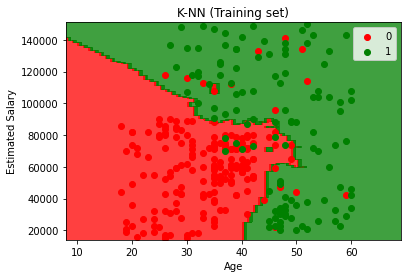

In [ ]:
# Visualizes the training set results by creating a grid of values for X and plotting the decision boundary.
# The scatter plot shows the actual training data points.
# The contour plot shows the regions classified as 0 (red) and 1 (green) by the K-NN classifier.

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


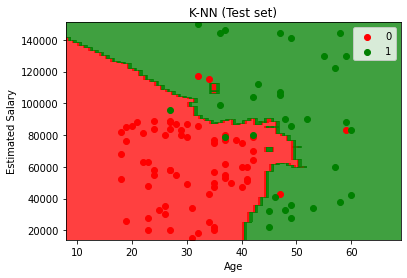

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()